In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

## 1. Q-learning in the wild (3 pts)

Here we use the qlearning agent on taxi env from openai gym.
You will need to insert a few agent functions here.

In [2]:
import random,math
import numpy as np
from collections import defaultdict

def flipCoin(prob):
    return random.random() < prob

class QLearningAgent():
  """
    Q-Learning Agent

    Instance variables you have access to
      - self.epsilon (exploration prob)
      - self.alpha (learning rate)
      - self.discount (discount rate aka gamma)

    Functions you should use
      - self.getLegalActions(state)
        which returns legal actions for a state
      - self.getQValue(state,action)
        which returns Q(state,action)
      - self.setQValue(state,action,value)
        which sets Q(state,action) := value

    !!!Important!!!
    NOTE: please avoid using self._qValues directly to make code cleaner
  """
  def __init__(self,alpha,epsilon,discount,getLegalActions):
    "We initialize agent and Q-values here."
    self.getLegalActions= getLegalActions
    self._qValues = defaultdict(lambda:defaultdict(lambda:0))
    self.alpha = alpha
    self.epsilon = epsilon
    self.discount = discount

  def getQValue(self, state, action):
    #print(state)
    #print(action)
    if not (state in self._qValues) or not (action in self._qValues[state]):
        return 0.0
    return self._qValues[state][action]

  def setQValue(self,state,action,value):
    """
      Sets the Qvalue for [state,action] to the given value
    """
    self._qValues[state][action] = value

#---------------------#start of your code#---------------------#

  def getValue(self, state):
    """
      Returns max_action Q(state,action)
      where the max is over legal actions.
    """
    #If there are no legal actions, return 0.0
    possibleActions = self.getLegalActions(state)
    if len(possibleActions) == 0:
        return 0.0
    q_values = [self.getQValue(state, action) for action in possibleActions]
    max_q_value = max(q_values)
    return max_q_value

  def getPolicy(self, state):
    """
      Compute the best action to take in a state.

    """
    possibleActions = self.getLegalActions(state)

    #If there are no legal actions, return None
    if len(possibleActions) == 0:
      return None
    q_values = np.array([self.getQValue(state, action) for action in possibleActions])
    best_action = possibleActions[np.argmax(q_values)]
    return best_action


  def getAction(self, state):
    """
      Compute the action to take in the current state, including exploration.

      With probability self.epsilon, we should take a random action.
      otherwise - the best policy action (self.getPolicy).

      HINT: You might want to use util.flipCoin(prob)
      HINT: To pick randomly from a list, use random.choice(list)

    """

    # Pick Action

    #If there are no legal actions, return None
    possibleActions = self.getLegalActions(state)
    if len(possibleActions) == 0:
      return None

    #choose action with epsilon exploration strategy:
    if flipCoin(self.epsilon):
        return random.choice(possibleActions)
    else:
      return self.getPolicy(state)

  def update(self, state, action, nextState, reward):
    """
      You should do your Q-Value update here

      NOTE: You should never call this function,
      it will be called on your behalf


    """
    #agent parameters
    gamma = self.discount
    learning_rate = self.alpha

    current_q_value = self.getQValue(state, action)

    next_q_values = [self.getQValue(nextState, next_action) for next_action in self.getLegalActions(nextState)]
    max_next_q_value = max(next_q_values) if next_q_values else 0.0

    new_q_value = (1 - learning_rate) * current_q_value + learning_rate * (reward + gamma * max_next_q_value)

    self.setQValue(state, action, new_q_value)

In [4]:
import gym
env = gym.make("Taxi-v3")
n_actions = env.action_space.n

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
def play_and_train(env,agent,t_max=10**4):
    """This function should
    - run a full game, actions given by agent.getAction(s)
    - train agent using agent.update(...) whenever possible
    - return total reward"""
    total_reward = 0.0
    s = env.reset()

    for t in range(t_max):
        a = agent.getAction(s)

        next_s,r,done,_ = env.step(a)

        #<train(update) agent for state s>
        agent.update(s, a, next_s, r)

        s = next_s
        total_reward +=r
        if done:break

    return total_reward

In [ ]:
agent = QLearningAgent(alpha=0.1,epsilon=0.5,discount=0.9,
                       getLegalActions = lambda s: range(n_actions))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Достигните положительной награды, постройте график

In [5]:
from IPython.display import clear_output


5.838218391834379e-05
15.0


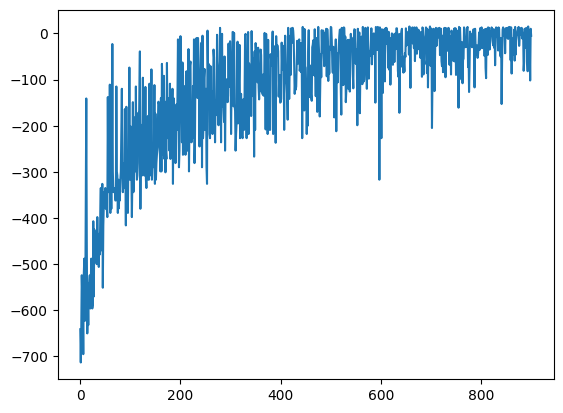

In [ ]:
rewards = []
for i in range(1000):
    rewards.append(play_and_train(env,agent))
    agent.epsilon *= 0.99
    if i % 100 ==0:
        clear_output(True)
        print(agent.epsilon)
        print(max(rewards))
        plt.plot(rewards)
        plt.show()


## 3. Continuous state space (2 pt)

Чтобы использовать табличный q-learning на continuous состояниях, надо как-то их обрабатывать и бинаризовать. Придумайте способ разбивки на дискретные состояния.

In [6]:
env = gym.make("CartPole-v0")
n_actions = env.action_space.n
print("first state:%s"%(env.reset()))


first state:[ 0.00346149  0.02420614 -0.0279303  -0.02082155]


/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


In [7]:
def binarize_state(state):
    x_bins = np.linspace(-2.4, 2.4, 10)
    x_dot_bins = np.linspace(-3.0, 3.0, 10)
    theta_bins = np.linspace(-0.2095, 0.2095, 10)
    theta_dot_bins = np.linspace(-2.0, 2.0, 10)

    x_index = np.digitize(state[0], x_bins) - 1
    x_dot_index = np.digitize(state[1], x_dot_bins) - 1
    theta_index = np.digitize(state[2], theta_bins) - 1
    theta_dot_index = np.digitize(state[3], theta_dot_bins) - 1

    return (x_index, x_dot_index, theta_index, theta_dot_index)

### Play a few games

Постройте распределения различных частей состояния игры. Сыграйте несколько игр и запишите все состояния.

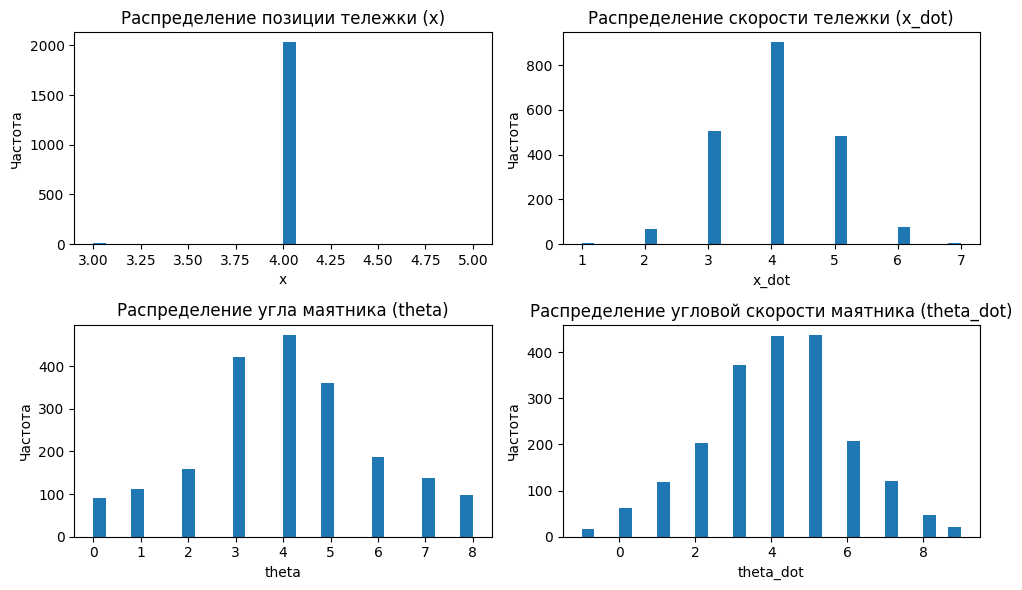

In [ ]:
n_games = 100

x_list = []
x_dot_list = []
theta_list = []
theta_dot_list = []

for _ in range(n_games):
    state = env.reset()
    done = False
    while not done:
        x, x_dot, theta, theta_dot = binarize_state(state)
        x_list.append(x)
        x_dot_list.append(x_dot)
        theta_list.append(theta)
        theta_dot_list.append(theta_dot)


        action = env.action_space.sample()
        state, reward, done, info = env.step(action)

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.hist(x_list, bins=30)
plt.title("Распределение позиции тележки (x)")
plt.xlabel("x")
plt.ylabel("Частота")

plt.subplot(2, 2, 2)
plt.hist(x_dot_list, bins=30)
plt.title("Распределение скорости тележки (x_dot)")
plt.xlabel("x_dot")
plt.ylabel("Частота")

plt.subplot(2, 2, 3)
plt.hist(theta_list, bins=30)
plt.title("Распределение угла маятника (theta)")
plt.xlabel("theta")
plt.ylabel("Частота")

plt.subplot(2, 2, 4)
plt.hist(theta_dot_list, bins=30)
plt.title("Распределение угловой скорости маятника (theta_dot)")
plt.xlabel("theta_dot")
plt.ylabel("Частота")

plt.tight_layout()
plt.show()


## Binarize environment

In [8]:
from gym.core import ObservationWrapper
class Binarizer(ObservationWrapper):

    def to_bin(self, value, bins):
        return np.digitize(value, bins) - 1

    def observation(self,state):
        x_bins = np.linspace(-2.4, 2.4, 10)
        x_dot_bins = np.linspace(-3.0, 3.0, 10)
        theta_bins = np.linspace(-0.2095, 0.2095, 10)
        theta_dot_bins = np.linspace(-2.0, 2.0, 10)

        state = (self.to_bin(state[0], x_bins), self.to_bin(state[1], x_dot_bins), self.to_bin(state[2], theta_bins), self.to_bin(state[3], theta_dot_bins))

        return state

In [9]:
env = Binarizer(gym.make("CartPole-v0"))

## Learn

In [10]:
agent = QLearningAgent(alpha=0.1,epsilon=0.5,discount=0.9,
                       getLegalActions = lambda s: range(n_actions))

0.26435407187997434
195.9
Win!


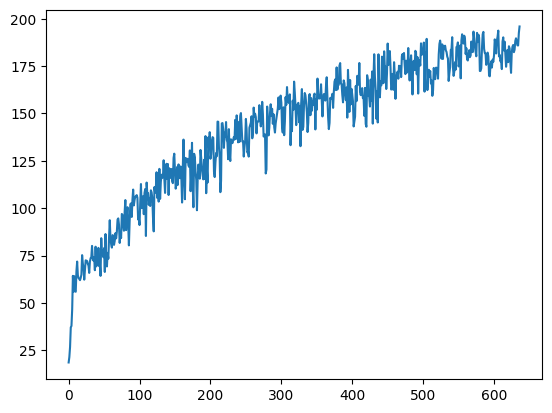

In [ ]:
rewards = []
rewBuf = []
ma = -1000000000000
for i in range(10000):
    for i in range(100):
        rewards.append(play_and_train(env,agent))
    agent.epsilon *= 0.999
    rewBuf.append(np.mean(rewards[-100:]))
    clear_output(True)
    print(agent.epsilon)
    print(rewBuf[-1])
    plt.plot(rewBuf)
    if(rewBuf[-1] > 195):
        print("Win!")
        break
    plt.show()


## 4. Experience replay (5 pts)

In [11]:
import random
class ReplayBuffer(object):
    def __init__(self, size):
        """Create Replay buffer.
        Parameters
        ----------
        size: int
            Max number of transitions to store in the buffer. When the buffer
            overflows the old memories are dropped.
        """
        self._storage = []
        self._maxsize = size
        self._replaceId = 0


    def __len__(self):
        return len(self._storage)

    def add(self, obs_t, action, reward, obs_tp1, done):
        '''
        Make sure, _storage will not exceed _maxsize.
        '''
        data = (obs_t, action, reward, obs_tp1, done)
        if len(self._storage) == self._maxsize:
            self._storage[self._replaceId] = data
            self._replaceId = (self._replaceId + 1) % self._maxsize
        else:
            self._storage.append(data)

    def sample(self, batch_size):
        """Sample a batch of experiences.
        Parameters
        ----------
        batch_size: int
            How many transitions to sample.
        Returns
        -------
        obs_batch: np.array
            batch of observations
        act_batch: np.array
            batch of actions executed given obs_batch
        rew_batch: np.array
            rewards received as results of executing act_batch
        next_obs_batch: np.array
            next set of observations seen after executing act_batch
        done_mask: np.array
            done_mask[i] = 1 if executing act_batch[i] resulted in
            the end of an episode and 0 otherwise.
        """

        idxs = np.random.choice(len(self._storage), batch_size)

        obs_batch = np.array([self._storage[idx][0] for idx in idxs])
        act_batch = np.array([self._storage[idx][1] for idx in idxs])
        rew_batch = np.array([self._storage[idx][2] for idx in idxs])
        next_obs_batch = np.array([self._storage[idx][3] for idx in idxs])
        done_mask = np.array([self._storage[idx][4] for idx in idxs])

        return obs_batch, act_batch, rew_batch, next_obs_batch, done_mask


Some tests to make sure your buffer works right

In [12]:
import numpy as np
replay = ReplayBuffer(2)
obj1 = tuple(range(5))
obj2 = tuple(range(5, 10))
replay.add(*obj1)
assert replay.sample(1)==obj1, "If there's just one object in buffer, it must be retrieved by buf.sample(1)"
replay.add(*obj2)
assert len(replay._storage)==2, "Please make sure __len__ methods works as intended."
replay.add(*obj2)
assert len(replay._storage)==2, "When buffer is at max capacity, replace objects instead of adding new ones."
assert tuple(np.unique(a) for a in replay.sample(100))==obj2
replay.add(*obj1)
assert max(len(np.unique(a)) for a in replay.sample(100))==2
replay.add(*obj1)
assert tuple(np.unique(a) for a in replay.sample(100))==obj1
print ("Success!")

Success!


Now let's use this buffer to improve training:

In [13]:
import gym
env = Binarizer(gym.make('CartPole-v0'))
n_actions = env.action_space.n

In [14]:
agent = QLearningAgent(alpha=0.1,epsilon=0.5,discount=0.9,
                       getLegalActions = lambda s: range(n_actions))
replay_buffer = ReplayBuffer(10000)

In [15]:
def play_and_train(env, agent, t_max=10**4, batch_size=10):
    """This function should
    - run a full game, actions given by agent.getAction(s)
    - train agent using agent.update(...) whenever possible
    - return total reward"""
    total_reward = 0.0
    s = env.reset()

    for t in range(t_max):
        a = agent.getAction(s)
        next_s, r, done,_ = env.step(a)

        #заполните реплей

        replay_buffer.add(s, a, r, next_s, done)

        s = next_s
        total_reward +=r
        if done:break

    #learn from replay
    if len(replay_buffer) >= batch_size:
      obs_batch, act_batch, rew_batch, next_obs_batch, done_mask = replay_buffer.sample(batch_size)
      for i in range(batch_size):
        agent.update(tuple(obs_batch[i]), act_batch[i], tuple(next_obs_batch[i]), rew_batch[i])

    return total_reward




Train with experience replay

0.18673214022713464
196.83
Win!


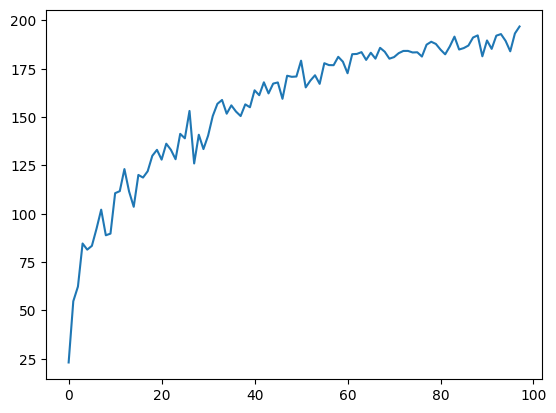

In [16]:
rewards = []
rewBuf = []
ma = -1000000000000
for i in range(10000):
    for i in range(100):
        rewards.append(play_and_train(env, agent, batch_size=1000))
    agent.epsilon *= 0.99
    rewBuf.append(np.mean(rewards[-100:]))
    clear_output(True)
    print(agent.epsilon)
    print(rewBuf[-1])
    plt.plot(rewBuf)
    if(rewBuf[-1] > 195):
        print("Win!")
        break
    plt.show()
